<a href="https://colab.research.google.com/github/mariadelcar18/Deliverable_9/blob/main/Deliverable_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. For my problem, I have decided to do a regression to predict the median_house_value based on six other variables ('median_income', 'total_rooms','housing_median_age','total_bedrooms', 'population', 'households') in the california_housing database. 




In [178]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/california_housing.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [179]:
df = df.replace(0, pd.np.nan)

# drop NaN values
df = df.dropna()

<ipython-input-179-e3f5bf853457>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df = df.replace(0, pd.np.nan)


In [180]:
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,1.0,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2.0,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3.0,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4.0,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,5.0,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0


In [181]:
# 2. Data Splitting 
from sklearn.model_selection import train_test_split

In [182]:
features = ['median_income', 'total_rooms','housing_median_age','total_bedrooms', 'population', 'households' ] 
X = df[features] 
Y = df['median_house_value']

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [184]:
# 3. Model Selection
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()

# 3. Model Fitting
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [185]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features)):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  -47051.49081148731
The coef (b_1) is  47900.54612860651
The coef (b_2) is  -20.10039492133537
The coef (b_3) is  1869.1130008030966
The coef (b_4) is  106.85647091389608
The coef (b_5) is  -33.854357513778034
The coef (b_6) is  116.81516580500296


In [192]:
# 3. Evaluate Model
median_house_value_pred = my_linear_regression.predict(X_test)
median_house_value_pred

array([247293.78763239, 233218.24327136, 136485.45521317, ...,
       117203.4095003 , 167558.08642515, 171925.49319349])

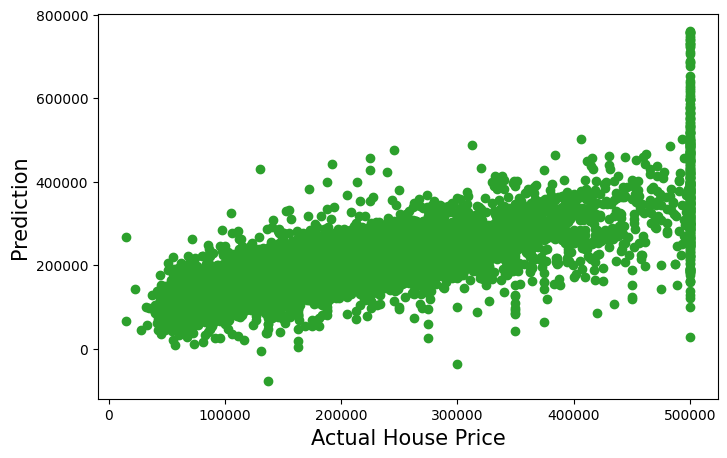

In [193]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = median_house_value_pred, color = 'Tab:green')
plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [195]:
def MAPE(Y, median_house_value_pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(median_house_value_pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)

In [196]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)
my_linear_regression.fit(X_train, Y_train)
median_house_value_pred = my_linear_regression.predict(X_test)

print('R^2 =', my_linear_regression.score(X_train, Y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, median_house_value_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, median_house_value_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, median_house_value_pred)))
print('MAPE:', MAPE(Y_test, median_house_value_pred)*100, "%")

R^2 = 0.565597792678248
Mean Absolute Error: 55878.01180155883
Mean Squared Error: 5808498116.385464
Root Mean Squared Error: 76213.50350420497
MAPE: 33.777923944833496 %


In [197]:
# 
from sklearn.ensemble import RandomForestRegressor
my_random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
my_random_forest.fit(X_train, Y_train)
median_house_value_pred = my_random_forest.predict(X_test)

print('R^2 =', my_random_forest.score(X_train, Y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, median_house_value_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, median_house_value_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, median_house_value_pred)))
print('MAPE:', MAPE(Y_test, median_house_value_pred)*100, "%")

R^2 = 0.9528646255222025
Mean Absolute Error: 48621.08611833333
Mean Squared Error: 4609548533.61438
Root Mean Squared Error: 67893.656063099
MAPE: 29.524283794038297 %


**4. Final Remarks**
Overall, even though the first test had a moderate performance (R^2 = 0.566 and a MAPE of 39%), the model seems to be more efficient using random forest regressors. This is because the model then improves to a R^2 value of 0.953 and low error values (MAE = 0.098, MSE = 0.018, RMSE = 0.135), which indicates has a high level of accuracy and predictive power. However, I believe MAPE value could be improved with more data. Overall, this model appears to be a good fit for the data and may be used for predicting the target variable with a significant level of accuracy.